**Voyage Analytics**: Integrating MLOps in Travel
Productionization of ML Systems

**Business Problem:**
Travel ML models for pricing, demand forecasting, and personalization struggle to move from experimentation to production. Deployments are manual, monitoring is limited, and models degrade over time due to seasonality and rapidly changing travel demand. This results in unreliable predictions and high operational overhead.

**Business Objective:**

The objective of Voyage Analytics is to productionize machine learning systems for travel analytics by integrating robust MLOps practices, enabling scalable, reliable, and automated deployment of ML models across travel use cases such as pricing optimization, demand forecasting, and customer personalization.

By implementing end-to-end MLOps pipelines—covering model training, versioning, CI/CD, monitoring, and automated retraining—the platform aims to:

1.Reduce model deployment time from experimentation to production

2.Ensure model reliability and performance consistency in dynamic travel demand environments

3.Continuously adapt to seasonality, demand shifts, and pricing fluctuations through automated retraining

4.Improve business decision-making with real-time, production-grade ML insights

5.Minimize operational risk via monitoring, alerting, and rollback mechanisms

GitHub Link -

**1. Regression Model Development:**

To build a regression model to predict the price of a flight using the flights.csv dataset. Focus on feature selection, model training, and validation to ensure accuracy and reliability.

**2. REST API for Regression Model:**

Develop a REST API using Flask to serve the flight price prediction model, enabling real-time price predictions.

**3. Containerization:**

Package and deploy the flight price prediction model using Docker, ensuring portability and ease of deployment.

**4. Kubernetes for Scalability:**

Deploy the model using Kubernetes to manage scalability and handle varying loads efficiently.

**5. Automated Workflows with Apache Airflow:**

Design and implement automated workflows for managing the travel data, specifically for the regression models. Develop Directed Acyclic Graphs (DAGs) to orchestrate complex workflows in an efficient and manageable way.

**6. CI/CD Pipeline with Jenkins:**

Implement a Continuous Integration/Continuous Deployment (CI/CD) pipeline using Jenkins for consistent and reliable deployment of the travel price prediction model.

**7. Model Tracking with MLFlow:**

Utilize MLFlow for tracking and managing different versions of the travel price prediction model, ensuring a systematic approach to model iteration and deployment.

**8. Gender Classification Model:**

Deploy a classification model to categorize a user's gender.

**9. Travel Recommendation Model:**

Build a recommendation model to provide hotel suggestions based on user preferences and historical data. Develop a Streamlit web application to display insights and visualizations derived from the deployed travel recommendation model, offering an interactive and user-friendly interface for data exploration.

In [1]:

# Import required libraries

import numpy as np
import pandas as pd
import datetime as dt

## Statistics Library
import scipy.stats as stats

## Data Visualisation Libraray
import matplotlib.pyplot as plt
import pylab
import seaborn as sns

## Machine Learning
#from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import ElasticNet
#from sklearn.ensemble import AdaBoostRegressor
#from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

## Importing essential libraries to check the accuracy
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_absolute_percentage_error

## Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
flights_df=pd.read_csv("C:/voyage_analytics/flight_price_app/dataset/flights.csv")
hotels_df=pd.read_csv("C:/voyage_analytics/flight_price_app/dataset//hotels.csv")
users_df=pd.read_csv("C:/voyage_analytics/flight_price_app/dataset//users.csv")

In [ ]:
# Dataset First Look
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency        date  
0  1434.38  1.76    676.53  FlyingDrops  09/26/2019  
1  1292.29  1.76    676.53  FlyingDrops  09/30/2019  
2  1487.52  1.66    637.56      CloudFy  10/03/2019  
3  1127.36  1.66    637.56      CloudFy  10/04/2019  
4  1684.05  2.16    830.86      CloudFy  10/10/2019

In [ ]:
# Dataset First Look
flights_df.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [ ]:
# Dataset Rows & Columns count
flights_df.shape

(271888, 10)

In [ ]:
# Summary of data frame
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


In [ ]:
# Dataset Rows & Columns count
flights_df.shape

(271888, 10)

In [ ]:
# Descriptive statistics that summarize the centraltendency, dispersion and shape of dataset's distribution
flights_df.describe()

travelCode       userCode         price           time  \
count  271888.000000  271888.000000  271888.00000  271888.000000   
mean    67971.500000     667.505495     957.37503       1.421147   
std     39243.724665     389.523127     362.31189       0.542541   
min         0.000000       0.000000     301.51000       0.440000   
25%     33985.750000     326.000000     672.66000       1.040000   
50%     67971.500000     659.000000     904.00000       1.460000   
75%    101957.250000    1011.000000    1222.24000       1.760000   
max    135943.000000    1339.000000    1754.17000       2.440000   

            distance  
count  271888.000000  
mean      546.955535  
std       208.851288  
min       168.220000  
25%       401.660000  
50%       562.140000  
75%       676.530000  
max       937.770000

In [ ]:
hotels_df.head()

travelCode  userCode     name               place  days   price    total  \
0           0         0  Hotel A  Florianopolis (SC)     4  313.02  1252.08   
1           2         0  Hotel K       Salvador (BH)     2  263.41   526.82   
2           7         0  Hotel K       Salvador (BH)     3  263.41   790.23   
3          11         0  Hotel K       Salvador (BH)     4  263.41  1053.64   
4          13         0  Hotel A  Florianopolis (SC)     1  313.02   313.02   

         date  
0  09/26/2019  
1  10/10/2019  
2  11/14/2019  
3  12/12/2019  
4  12/26/2019

In [ ]:
hotels_df.columns

Index(['travelCode', 'userCode', 'name', 'place', 'days', 'price', 'total',
       'date'],
      dtype='object')

In [ ]:
# Dataset Rows & Columns count
hotels_df.shape

(40552, 8)

In [ ]:
# Summary of data frame
hotels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40552 entries, 0 to 40551
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   travelCode  40552 non-null  int64  
 1   userCode    40552 non-null  int64  
 2   name        40552 non-null  object 
 3   place       40552 non-null  object 
 4   days        40552 non-null  int64  
 5   price       40552 non-null  float64
 6   total       40552 non-null  float64
 7   date        40552 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 2.5+ MB


In [ ]:
# Descriptive statistics that summarize the centraltendency, dispersion and shape of dataset's distribution
hotels_df.describe()

travelCode      userCode          days         price         total
count   40552.000000  40552.000000  40552.000000  40552.000000  40552.000000
mean    67911.794461    666.963726      2.499679    214.439554    536.229513
std     39408.199333    391.136794      1.119326     76.742305    319.331482
min         0.000000      0.000000      1.000000     60.390000     60.390000
25%     33696.750000    323.000000      1.000000    165.990000    247.620000
50%     67831.000000    658.000000      2.000000    242.880000    495.240000
75%    102211.250000   1013.000000      4.000000    263.410000    742.860000
max    135942.000000   1339.000000      4.000000    313.020000   1252.080000

In [ ]:
users_df.head()

code company             name  gender  age
0     0    4You        Roy Braun    male   21
1     1    4You   Joseph Holsten    male   37
2     2    4You    Wilma Mcinnis  female   48
3     3    4You     Paula Daniel  female   23
4     4    4You  Patricia Carson  female   44

In [ ]:
users_df.columns

Index(['code', 'company', 'name', 'gender', 'age'], dtype='object')

In [ ]:
# Summary of data frame
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   code     1340 non-null   int64 
 1   company  1340 non-null   object
 2   name     1340 non-null   object
 3   gender   1340 non-null   object
 4   age      1340 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 52.5+ KB


In [ ]:
# Descriptive statistics that summarize the centraltendency, dispersion and shape of dataset's distribution
users_df.describe()

code          age
count  1340.000000  1340.000000
mean    669.500000    42.742537
std     386.968991    12.869779
min       0.000000    21.000000
25%     334.750000    32.000000
50%     669.500000    42.000000
75%    1004.250000    54.000000
max    1339.000000    65.000000

# Checking Duplicate Values

In [ ]:
# Duplicate Value Count
flights_df.duplicated().sum()

np.int64(0)

In [ ]:
hotels_df.duplicated().sum()

np.int64(0)

In [ ]:
users_df.duplicated().sum()

np.int64(0)

# Checking missing/Null values

In [ ]:

flights_df.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

In [ ]:
hotels_df.isnull().sum()

travelCode    0
userCode      0
name          0
place         0
days          0
price         0
total         0
date          0
dtype: int64

In [ ]:
users_df.isnull().sum()

code       0
company    0
name       0
gender     0
age        0
dtype: int64

**# Data Wrangling**

In [ ]:
flights_df['from'].value_counts()

from
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64

In [ ]:
flights_df['to'].value_counts()

to
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64

In [ ]:
flights_df['flightType'].value_counts()

flightType
firstClass    116418
premium        78004
economic       77466
Name: count, dtype: int64

In [ ]:
flights_df['agency'].value_counts()

agency
Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: count, dtype: int64

In [ ]:
flights_df['route']=flights_df['from']+'-'+flights_df['to']

In [ ]:
flights_df['route'].value_counts()

route
Florianopolis (SC)-Aracaju (SE)         8643
Aracaju (SE)-Florianopolis (SC)         8643
Florianopolis (SC)-Campo Grande (MS)    8253
Campo Grande (MS)-Florianopolis (SC)    8253
Florianopolis (SC)-Brasilia (DF)        7779
                                        ... 
Natal (RN)-Rio de Janeiro (RJ)           950
Sao Paulo (SP)-Rio de Janeiro (RJ)       934
Rio de Janeiro (RJ)-Sao Paulo (SP)       934
Natal (RN)-Salvador (BH)                 926
Salvador (BH)-Natal (RN)                 926
Name: count, Length: 70, dtype: int64

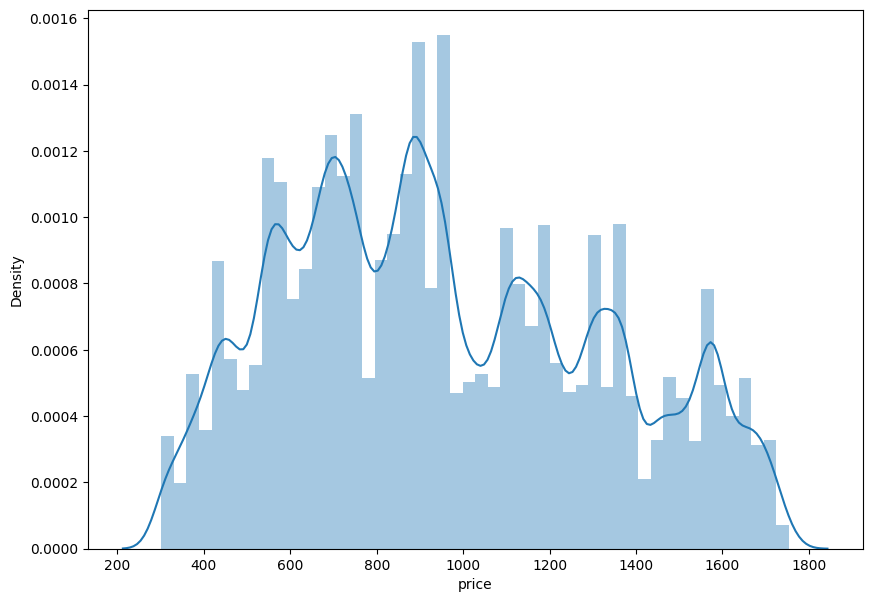

In [ ]:
# Price distributions
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['price'])
plt.show()

The given plot shows that most bookings fall between  600 and 900
It helps in understanding the typical spending patterns on flight bookings.

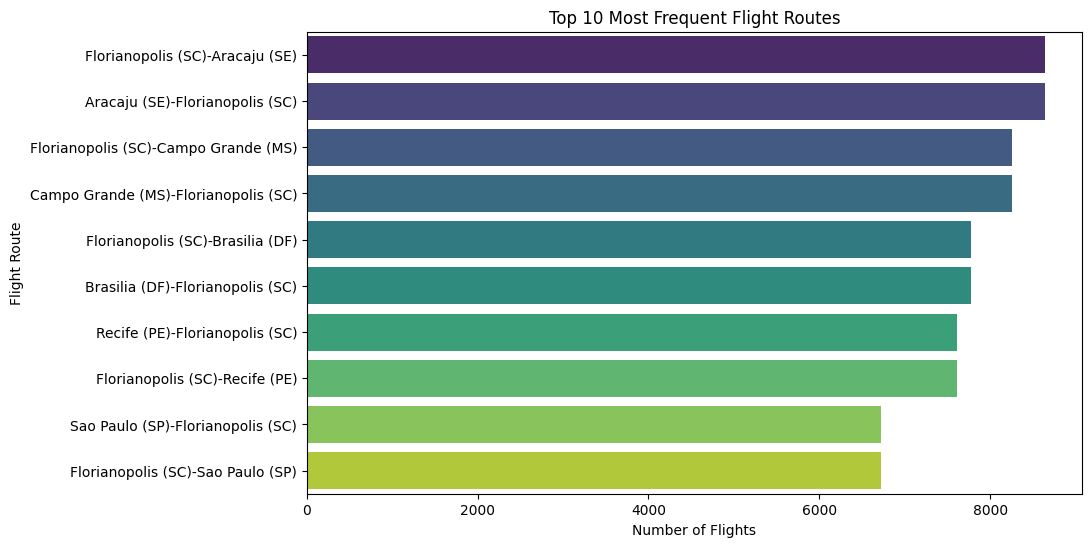

In [ ]:
#Top 10 Most Frequent Flight Routes
plt.figure(figsize=(10, 6))
sns.countplot(y='route', data=flights_df, order=flights_df['route'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Most Frequent Flight Routes')
plt.xlabel('Number of Flights')
plt.ylabel('Flight Route')
plt.show()

This plot effectively highlights the busiest flight corridors within the dataset. We can observe that certain routes, such as 'Florianopolis (SC)-Aracaju (SE)' and 'Aracaju (SE)-Florianopolis (SC)', appear to be significantly more frequent than others.

In [ ]:
type_count=flights_df['flightType'].value_counts()

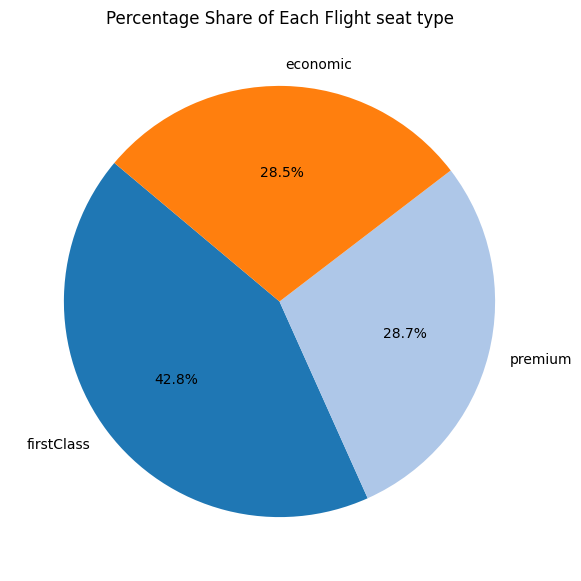

In [ ]:
plt.figure(figsize=(10, 7))
plt.pie(type_count, labels=type_count.index,autopct='%1.1f%%',  startangle=140,colors=plt.get_cmap('tab20').colors)
plt.title('Percentage Share of Each Flight seat type')
plt.show()

The pie chart reveals that the dataset includes three flight types: first class, premium, and economy. The highest percentage share is first class at around 42%, followed by premium at 28.7%, and economy at 28.5%.

This indicates a preference for first class tickets among travelers.

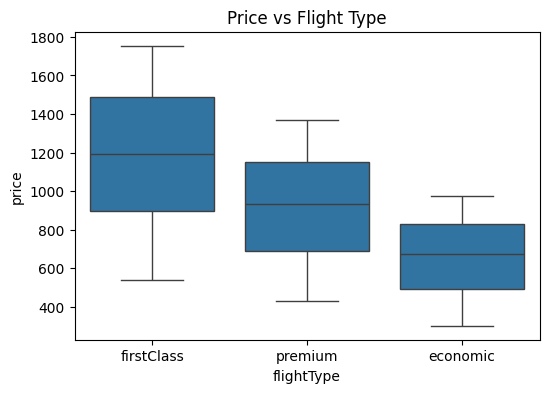

In [ ]:
#Price vs Flight Type
plt.figure(figsize=(6,4))
sns.boxplot(x="flightType", y="price", data = flights_df.sort_values("price", ascending = False))
plt.title("Price vs Flight Type")
plt.show()

1.First Class flights generally have the highest prices and the widest range of prices, indicating more variability.
2.Premium flights are moderately priced, falling between first class and economic.
3.Economic flights are the most affordable, typically having a narrower price range and fewer high-end outliers.

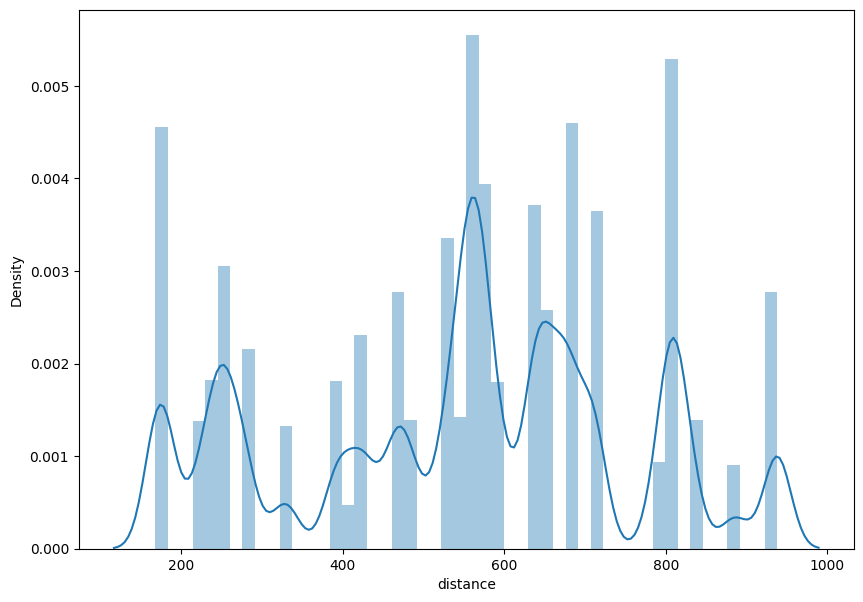

In [ ]:
# distribution of distance
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['distance'])
plt.show()

The given plot shows how frequently flights occur at various distance ranges.

Most flights are between 500 and 700 miles, while the fewest are in the 300 to 400-mile range.


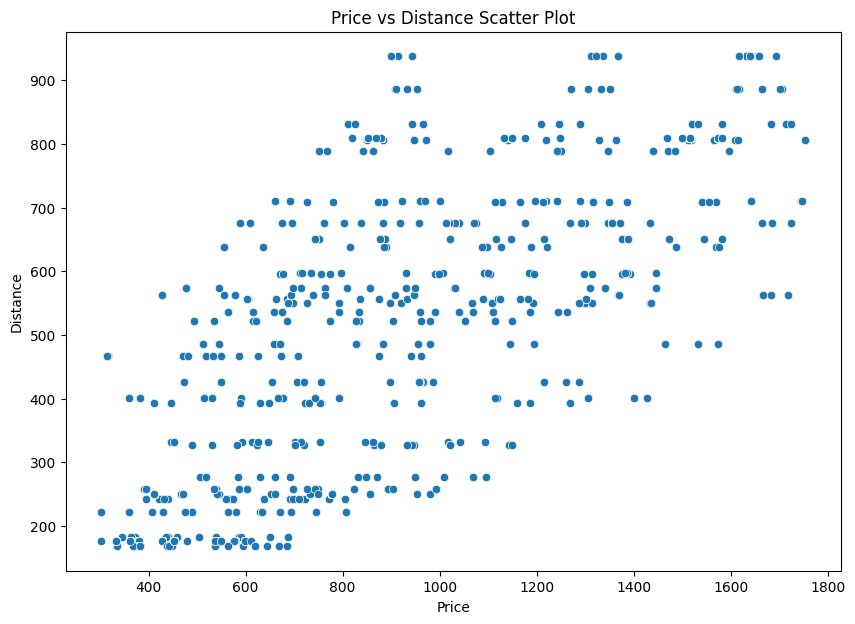

In [ ]:
# Visualisation of correlation between price and distance
plt.figure(figsize=(10, 7))
sns.scatterplot(x="price", y="distance", data=flights_df)
plt.xlabel("Price")
plt.ylabel("Distance")
plt.title("Price vs Distance Scatter Plot")
plt.show()

<Figure size 1000x1000 with 0 Axes>

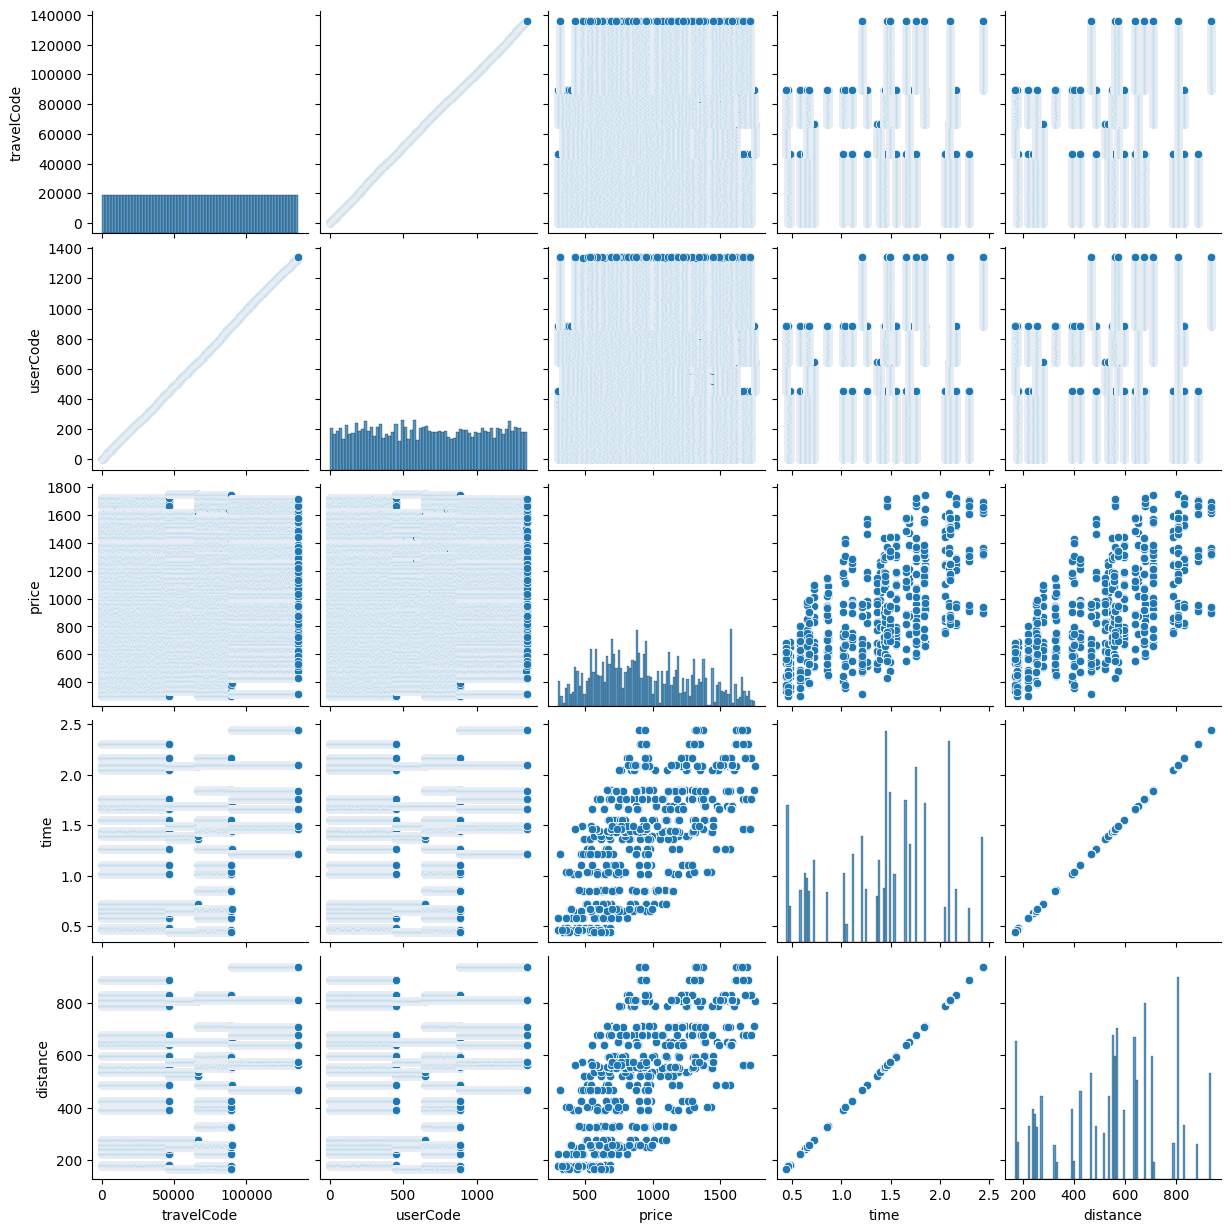

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(10, 10))
sns.pairplot(flights_df)
plt.show()

This plot reveals a positive correlation between price and distance, indicating that as the distance of a flight increases, the ticket price tends to rise.
However, some shorter flights have higher prices, which may be due to factors such as ticket type or flight class(i.e.First class)

In [ ]:
#Extracting month and day columns
flights_df['date'] = pd.to_datetime(flights_df['date'], format='%m/%d/%Y')
flights_df['month'] = flights_df['date'].dt.month
flights_df['year'] = flights_df['date'].dt.year
flights_df['day'] = flights_df['date'].dt.day
flights_df['weekday_num'] = flights_df['date'].dt.weekday

In [ ]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03   
3  1127.36  1.66    637.56      CloudFy 2019-10-04   
4  1684.05  2.16    830.86      CloudFy 2019-10-10   

                              route  month  year  day  weekday_num  
0    Recife (PE)-Florianopolis (SC)      9  2019   26            3  
1    Florianopolis (SC)-Recife (PE)      9  2019   30            0  
2  Brasilia (DF)-Florianopolis (SC)     10  2019    3            3  
3  Florianopolis (SC)-Brasilia (DF)     10  2019    4            4  
4        Aracaju (SE)-Salvador (BH)     10  2019   10            3

In [ ]:
def convert_time(time):
  hour=int(time)
  minute=time-hour
  totalmin=int(hour*60)+int(minute*100)
  return totalmin

In [ ]:
flights_df['total_time']=flights_df['time'].apply(convert_time)

In [ ]:
#Calculate Speed in km/hr for further insights
flights_df['speed'] = (flights_df.distance/(flights_df.total_time/60))

In [ ]:
flights_df.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03   
3  1127.36  1.66    637.56      CloudFy 2019-10-04   
4  1684.05  2.16    830.86      CloudFy 2019-10-10   

                              route  month  year  day  weekday_num  \
0    Recife (PE)-Florianopolis (SC)      9  2019   26            3   
1    Florianopolis (SC)-Recife (PE)      9  2019   30            0   
2  Brasilia (DF)-Florianopolis (SC)     10  2019    3            3   
3  Florianopolis (SC)-Brasilia (DF)     10  2019    4            4   
4        Aracaju (SE)-Salvador (BH)     10  2019   10            3   

   total_time       speed  
0         136  298.469118  
1         136  298.469118  
2         125  306.028800  
3         125  306.028800  
4         136  366.555882

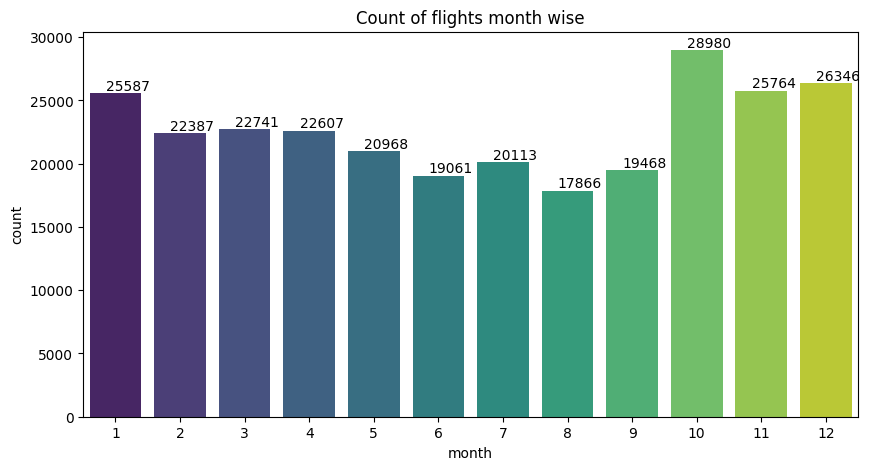

In [ ]:
#Count of flights month wise
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax = sns.countplot(x = 'month', data = flights_df, palette = 'viridis')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')
plt.show()

This shows the distribution of flight counts across different months.
It helps in identifying peak travel seasons or months with higher flight activity.

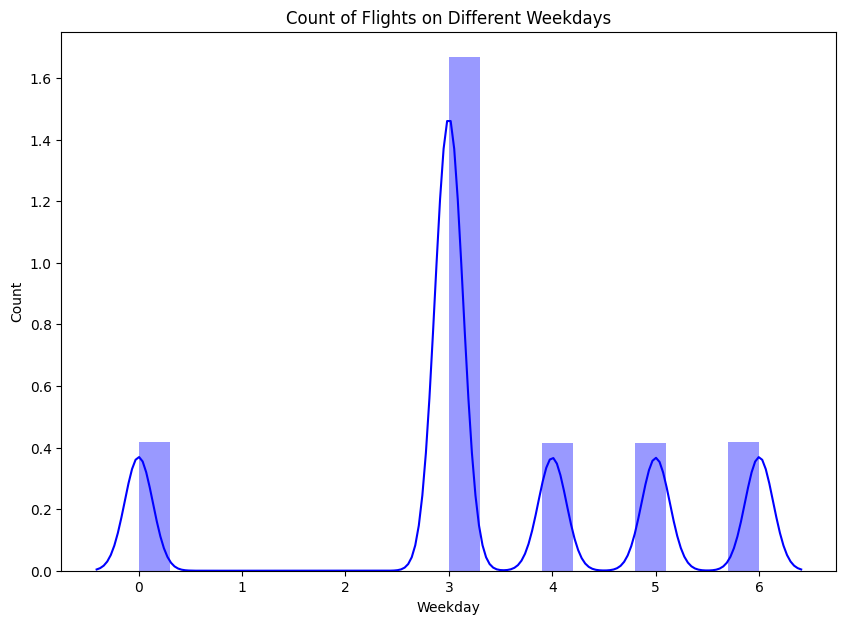

In [ ]:
#count of flights on different weekdays
plt.figure(figsize=(10, 7))
sns.distplot(flights_df['weekday_num'], bins=20, kde=True,color= 'blue' )
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.title('Count of Flights on Different Weekdays')
plt.show()

The distplot reveals that the majority of flights operate on Thursday, while there are no flights running on Tuesday and Wednesday.

In [ ]:
# Select only numeric columns for correlation calculation
numeric_flights_df = flights_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_flights_df.corr()

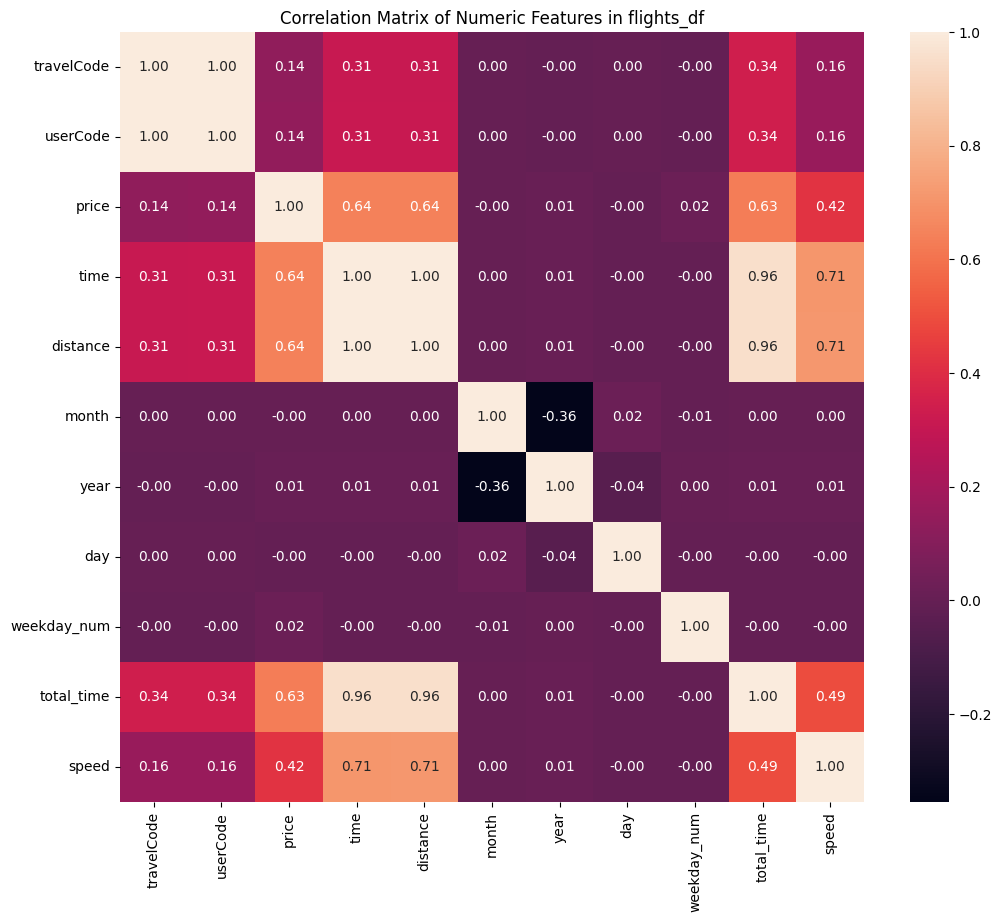

In [ ]:
# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix of Numeric Features in flights_df')
plt.show()

The heatmap reveals that flight price, has a positive correlation with variables such as total time, distance, and speed.
Also, the distance and total time are highly correlated, indicating multicollinearity, meaning they provide similar information regarding the target variable.

Categorical Encoding

In [ ]:
# Encoding the categorical columns
categorical_data = flights_df.select_dtypes(exclude=['int64', 'float','int32'])
numerical_data = flights_df.select_dtypes(include=['int64', 'float','int32'])

In [ ]:
categorical_data.head()

from                  to  flightType       agency       date  \
0         Recife (PE)  Florianopolis (SC)  firstClass  FlyingDrops 2019-09-26   
1  Florianopolis (SC)         Recife (PE)  firstClass  FlyingDrops 2019-09-30   
2       Brasilia (DF)  Florianopolis (SC)  firstClass      CloudFy 2019-10-03   
3  Florianopolis (SC)       Brasilia (DF)  firstClass      CloudFy 2019-10-04   
4        Aracaju (SE)       Salvador (BH)  firstClass      CloudFy 2019-10-10   

                              route  
0    Recife (PE)-Florianopolis (SC)  
1    Florianopolis (SC)-Recife (PE)  
2  Brasilia (DF)-Florianopolis (SC)  
3  Florianopolis (SC)-Brasilia (DF)  
4        Aracaju (SE)-Salvador (BH)

In [ ]:

label= LabelEncoder()
categorical_data = categorical_data.apply(LabelEncoder().fit_transform)
categorical_data.head()


from  to  flightType  agency  date  route
0     5   3           1       1     0     43
1     3   5           1       1     4     28
2     1   3           1       0     5     10
3     3   1           1       0     6     25
4     0   7           1       0    10      6

In [ ]:

label_encoders = {}

for col in categorical_data:
    label = LabelEncoder()
    categorical_data[col] = label.fit_transform(categorical_data[col])
    label_encoders[col] = label


In [ ]:
label_encoders

{'from': LabelEncoder(),
 'to': LabelEncoder(),
 'flightType': LabelEncoder(),
 'agency': LabelEncoder(),
 'date': LabelEncoder(),
 'route': LabelEncoder()}

In [ ]:
import pickle
with open("label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)


In [ ]:
categorical_data.head()

from  to  flightType  agency  date  route
0     5   3           1       1     0     43
1     3   5           1       1     4     28
2     1   3           1       0     5     10
3     3   1           1       0     6     25
4     0   7           1       0    10      6

In [ ]:
import joblib
# Save the LabelEncoder to a file
joblib.dump(label, '/content/label.pkl')

['/content/label.pkl']

In [ ]:
# Copy the file to Google Drive
!cp label_encoders.pkl '/content/drive/MyDrive'
print('Label encoder saved to Google Drive')

Label encoder saved to Google Drive


In [ ]:
encode_df= pd.concat([categorical_data,numerical_data], axis=1)

In [ ]:
encode_df.head()

from  to  flightType  agency  date  route  travelCode  userCode    price  \
0     5   3           1       1     0     43           0         0  1434.38   
1     3   5           1       1     4     28           0         0  1292.29   
2     1   3           1       0     5     10           1         0  1487.52   
3     3   1           1       0     6     25           1         0  1127.36   
4     0   7           1       0    10      6           2         0  1684.05   

   time  distance  month  year  day  weekday_num  total_time       speed  
0  1.76    676.53      9  2019   26            3         136  298.469118  
1  1.76    676.53      9  2019   30            0         136  298.469118  
2  1.66    637.56     10  2019    3            3         125  306.028800  
3  1.66    637.56     10  2019    4            4         125  306.028800  
4  2.16    830.86     10  2019   10            3         136  366.555882

In [ ]:
encode_df.drop(['weekday_num'], axis=1, inplace=True)

Feature Selection

In [ ]:
concat_data=pd.merge(flights_df,users_df,how='left',left_on='userCode',right_on='code')

In [ ]:
concat_data.head()

travelCode  userCode                from                  to  flightType  \
0           0         0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0         0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1         0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1         0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2         0        Aracaju (SE)       Salvador (BH)  firstClass   

     price  time  distance       agency       date  ...  year  day  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26  ...  2019   26   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30  ...  2019   30   
2  1487.52  1.66    637.56      CloudFy 2019-10-03  ...  2019    3   
3  1127.36  1.66    637.56      CloudFy 2019-10-04  ...  2019    4   
4  1684.05  2.16    830.86      CloudFy 2019-10-10  ...  2019   10   

   weekday_num  total_time       speed  code  company       name gender age  
0            3         136  298.469118     0     4You  Roy Braun   male  21  
1            0         136  298.469118     0     4You  Roy Braun   male  21  
2            3         125  306.028800     0     4You  Roy Braun   male  21  
3            4         125  306.028800     0     4You  Roy Braun   male  21  
4            3         136  366.555882     0     4You  Roy Braun   male  21  

[5 rows x 22 columns]

In [ ]:
concat_data1f=pd.merge(concat_data,hotels_df,how='left',left_on='travelCode',right_on='travelCode')

In [ ]:
concat_data1f.head()

travelCode  userCode_x                from                  to  flightType  \
0           0           0         Recife (PE)  Florianopolis (SC)  firstClass   
1           0           0  Florianopolis (SC)         Recife (PE)  firstClass   
2           1           0       Brasilia (DF)  Florianopolis (SC)  firstClass   
3           1           0  Florianopolis (SC)       Brasilia (DF)  firstClass   
4           2           0        Aracaju (SE)       Salvador (BH)  firstClass   

   price_x  time  distance       agency     date_x  ...     name_x  gender  \
0  1434.38  1.76    676.53  FlyingDrops 2019-09-26  ...  Roy Braun    male   
1  1292.29  1.76    676.53  FlyingDrops 2019-09-30  ...  Roy Braun    male   
2  1487.52  1.66    637.56      CloudFy 2019-10-03  ...  Roy Braun    male   
3  1127.36  1.66    637.56      CloudFy 2019-10-04  ...  Roy Braun    male   
4  1684.05  2.16    830.86      CloudFy 2019-10-10  ...  Roy Braun    male   

   age  userCode_y   name_y               place  days  price_y    total  \
0   21         0.0  Hotel A  Florianopolis (SC)   4.0   313.02  1252.08   
1   21         0.0  Hotel A  Florianopolis (SC)   4.0   313.02  1252.08   
2   21         NaN      NaN                 NaN   NaN      NaN      NaN   
3   21         NaN      NaN                 NaN   NaN      NaN      NaN   
4   21         0.0  Hotel K       Salvador (BH)   2.0   263.41   526.82   

       date_y  
0  09/26/2019  
1  09/26/2019  
2         NaN  
3         NaN  
4  10/10/2019  

[5 rows x 29 columns]

In [ ]:
concat_data1f.columns

Index(['travelCode', 'userCode_x', 'from', 'to', 'flightType', 'price_x',
       'time', 'distance', 'agency', 'date_x', 'route', 'month', 'year', 'day',
       'weekday_num', 'total_time', 'speed', 'code', 'company', 'name_x',
       'gender', 'age', 'userCode_y', 'name_y', 'place', 'days', 'price_y',
       'total', 'date_y'],
      dtype='object')

In [ ]:
concat_data1f.drop(['time','date_x','weekday_num','code','userCode_y','date_y'], axis=1, inplace=True)

In [ ]:
con_categorical_data =concat_data1f.select_dtypes(exclude=['int64', 'float','int32'])
con_numerical_data = concat_data1f.select_dtypes(include=['int64', 'float','int32'])

In [ ]:
le = LabelEncoder()
con_categorical_data = con_categorical_data.apply(LabelEncoder().fit_transform)
con_categorical_data.head()

from  to  flightType  agency  route  company  name_x  gender  name_y  place
0     5   3           1       1     43        0    1116       1       0      3
1     3   5           1       1     28        0    1116       1       0      3
2     1   3           1       0     10        0    1116       1       9      9
3     3   1           1       0     25        0    1116       1       9      9
4     0   7           1       0      6        0    1116       1       7      7

In [ ]:
concat_encode_df= pd.concat([con_categorical_data,con_numerical_data], axis=1)

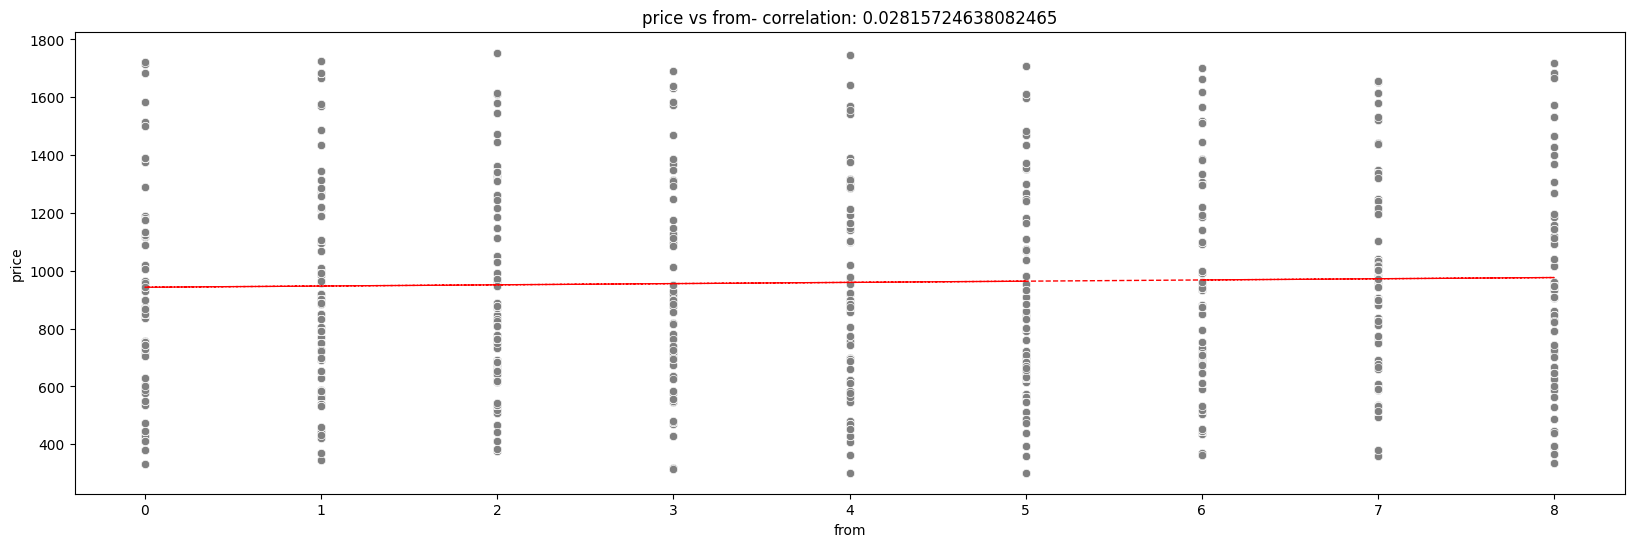

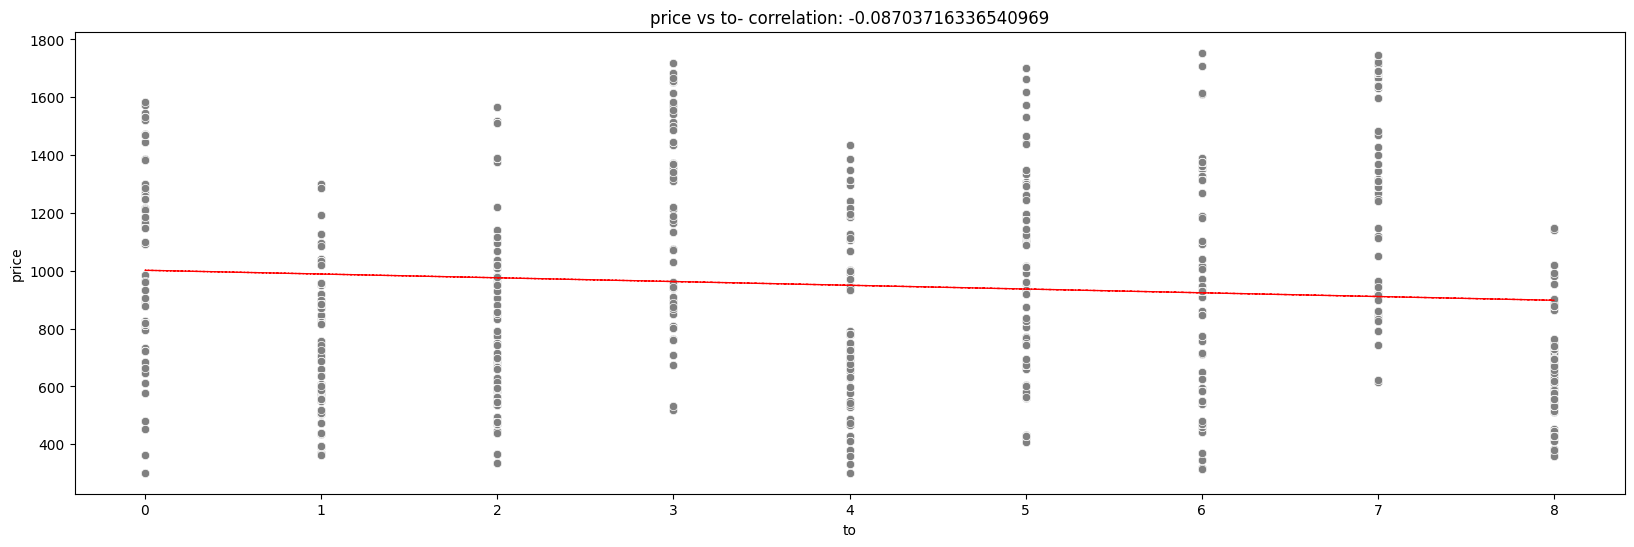

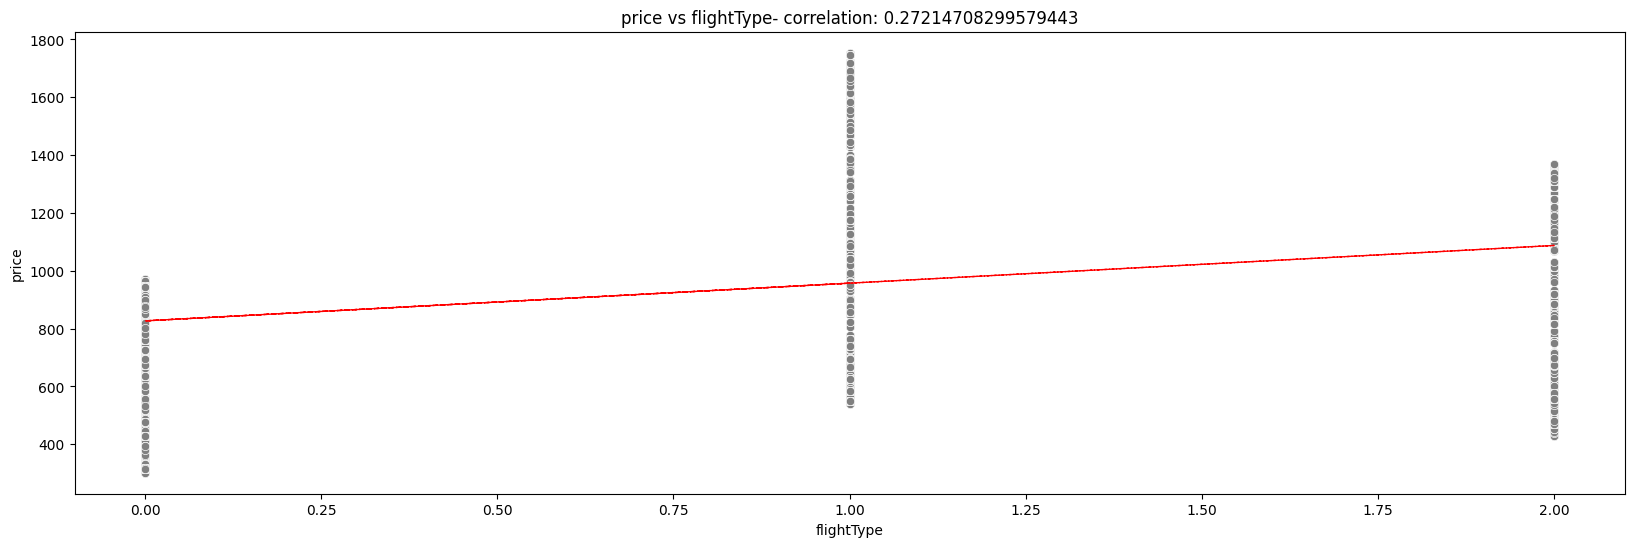

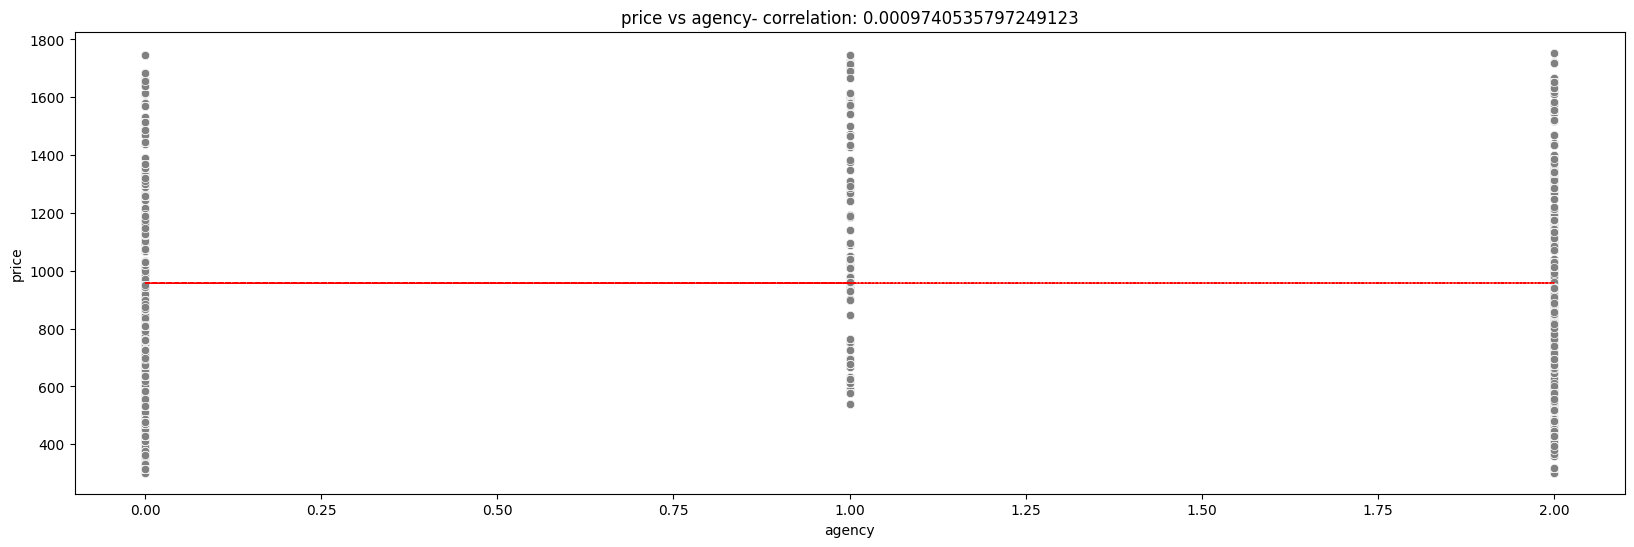

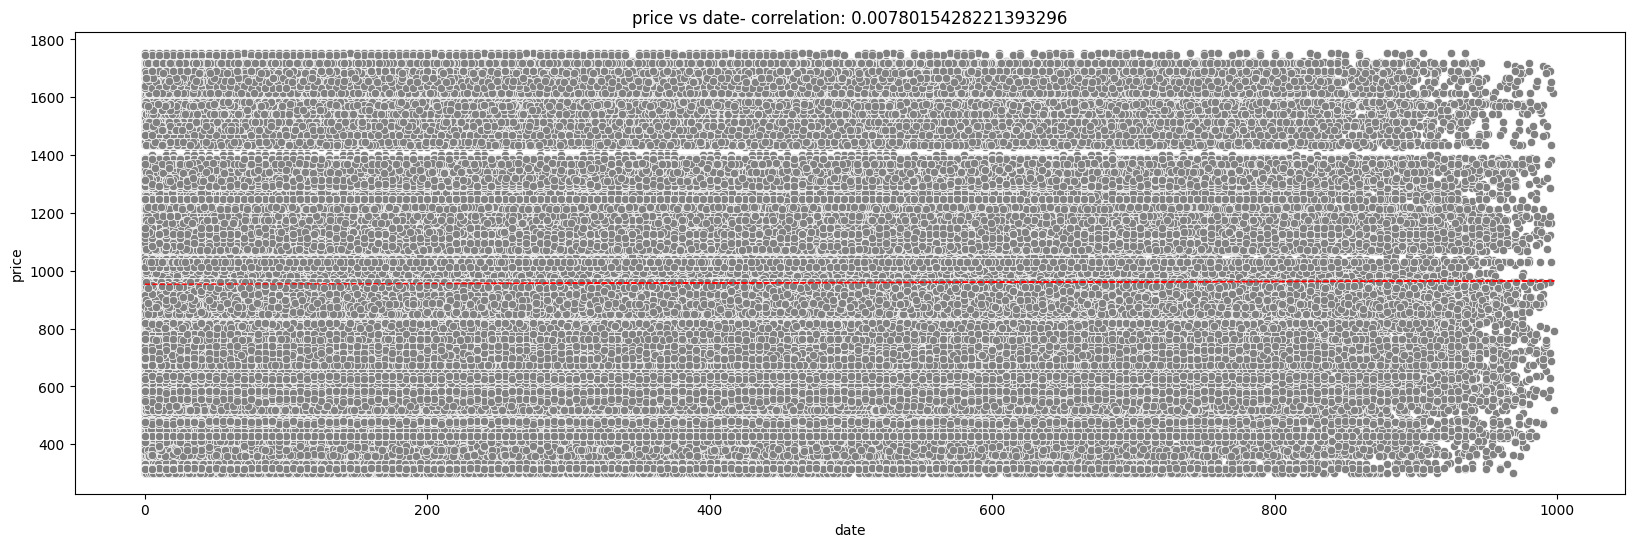

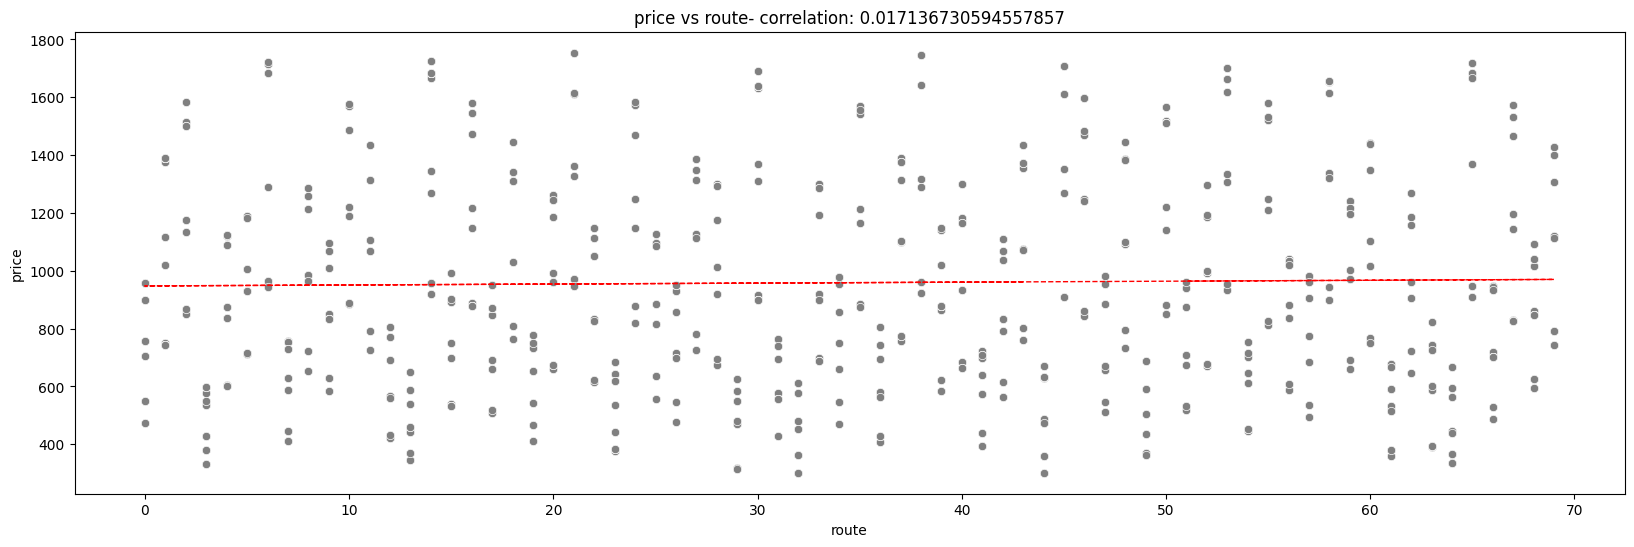

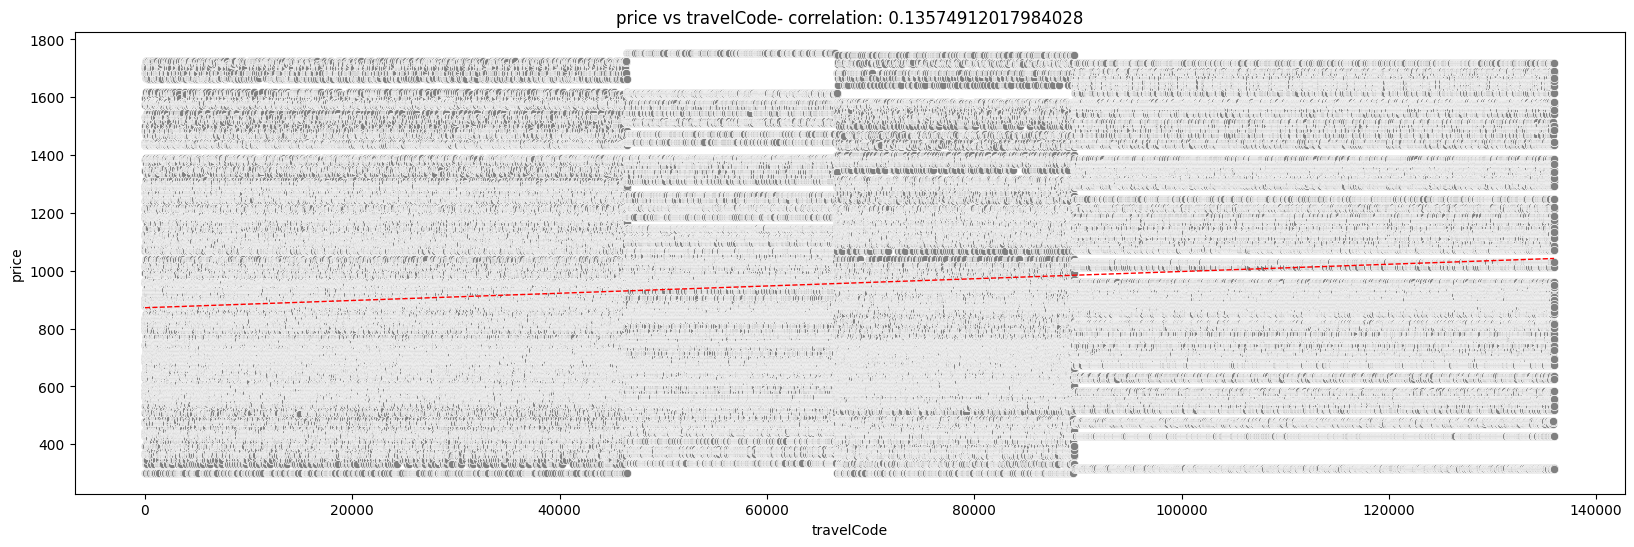

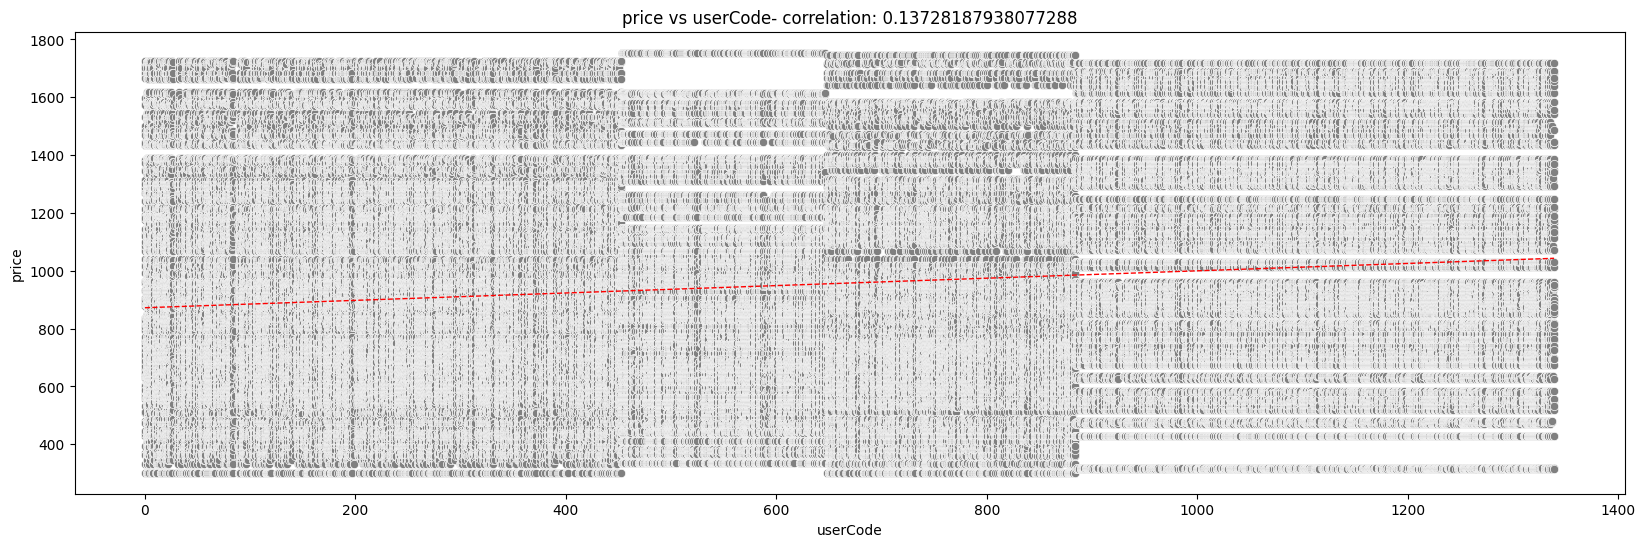

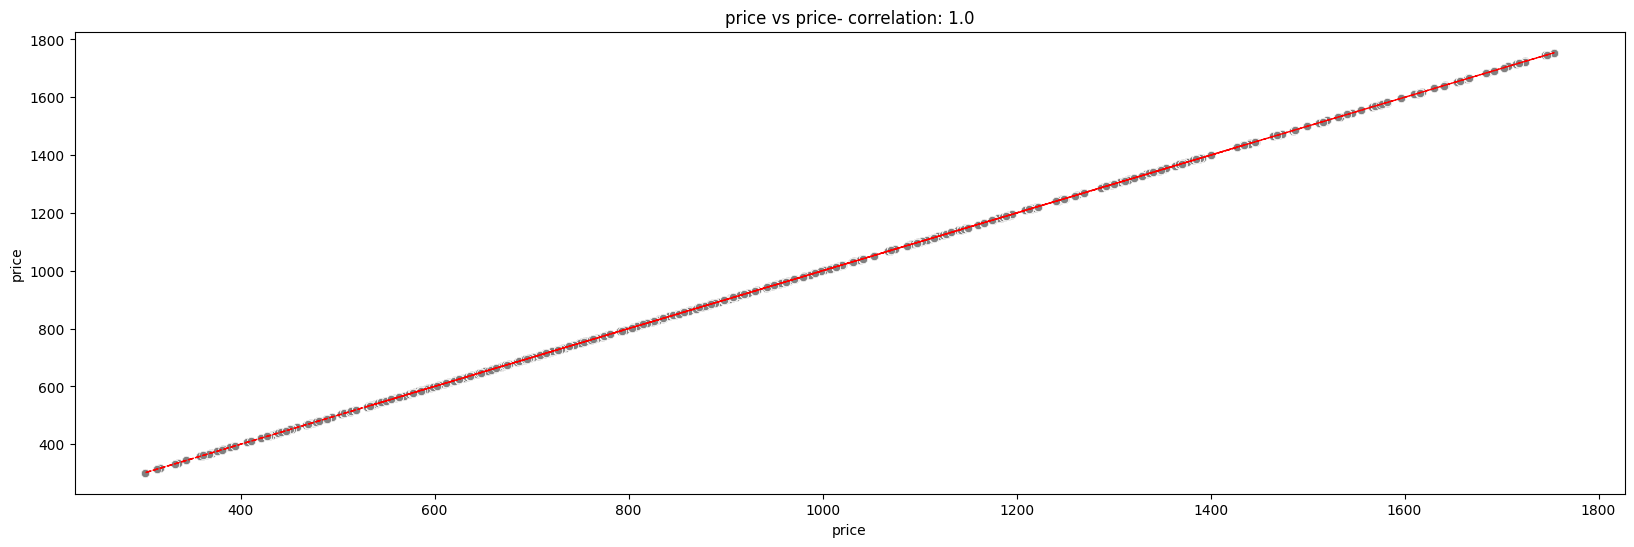

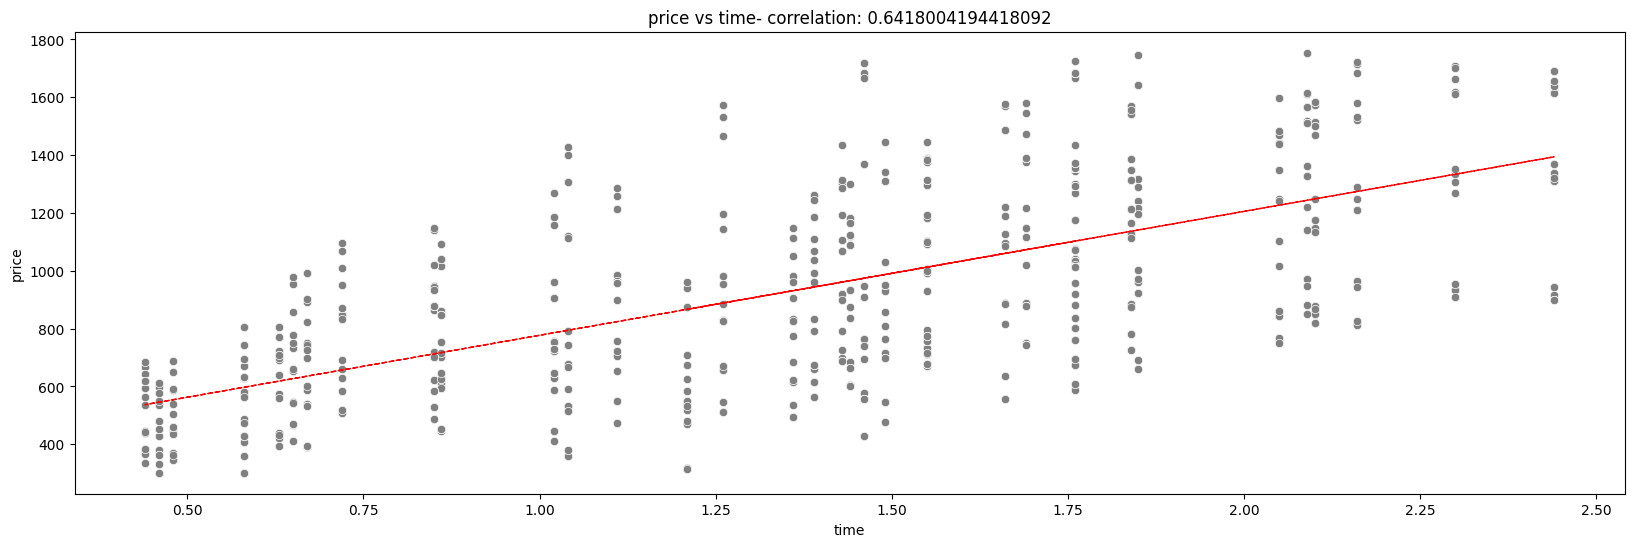

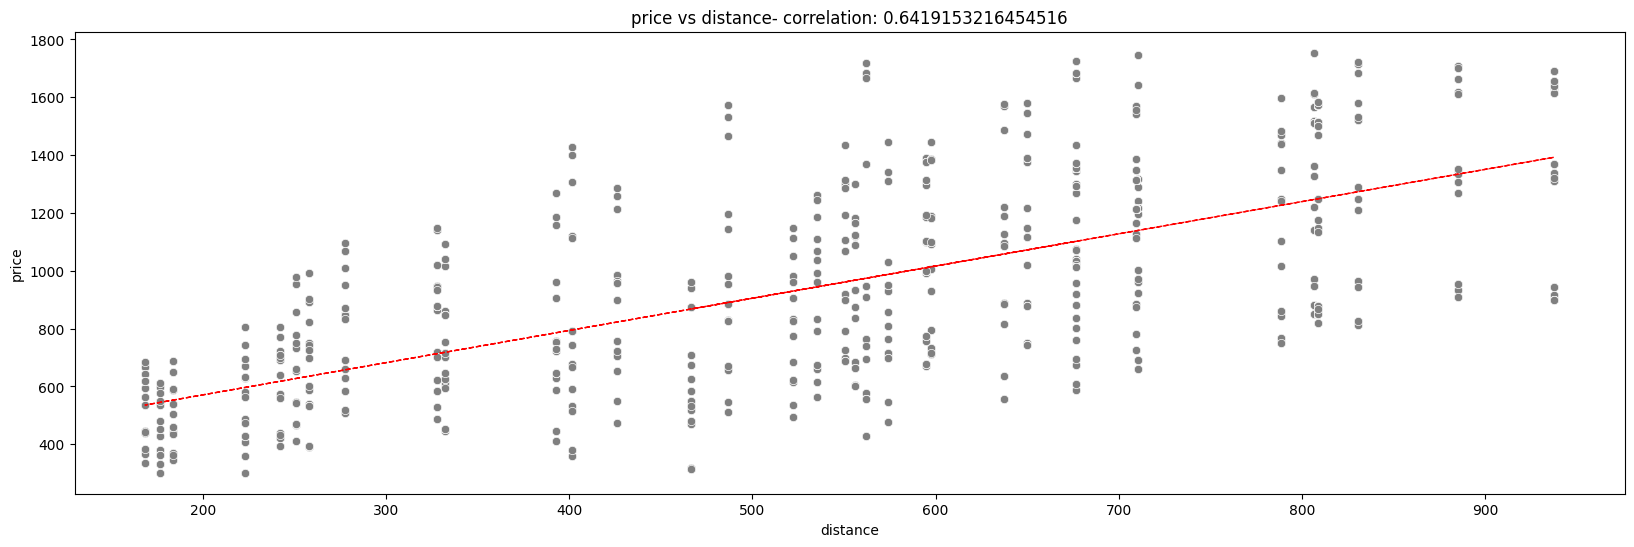

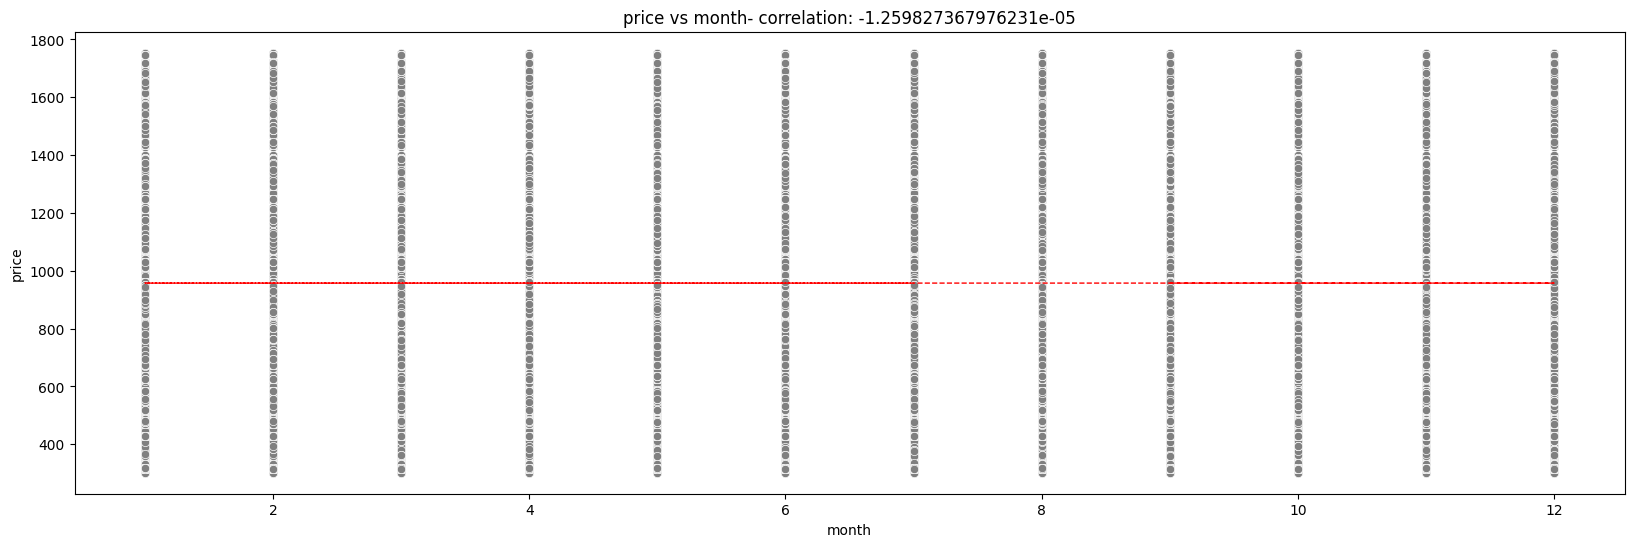

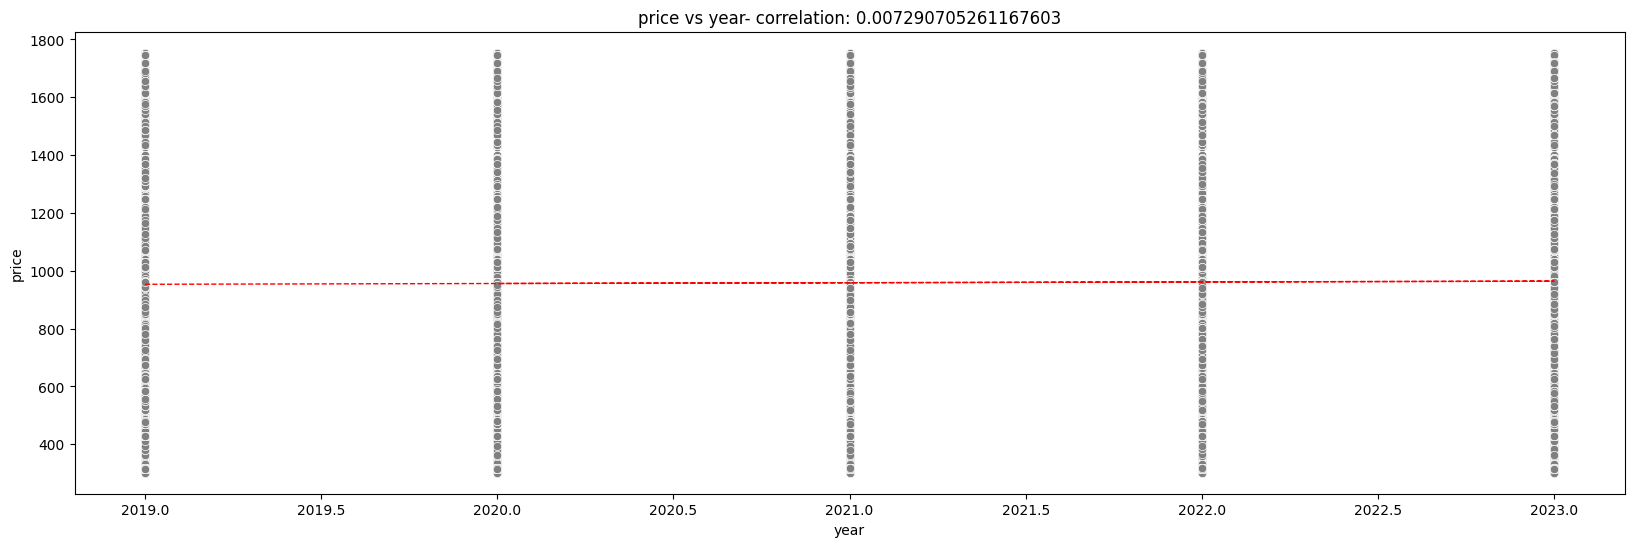

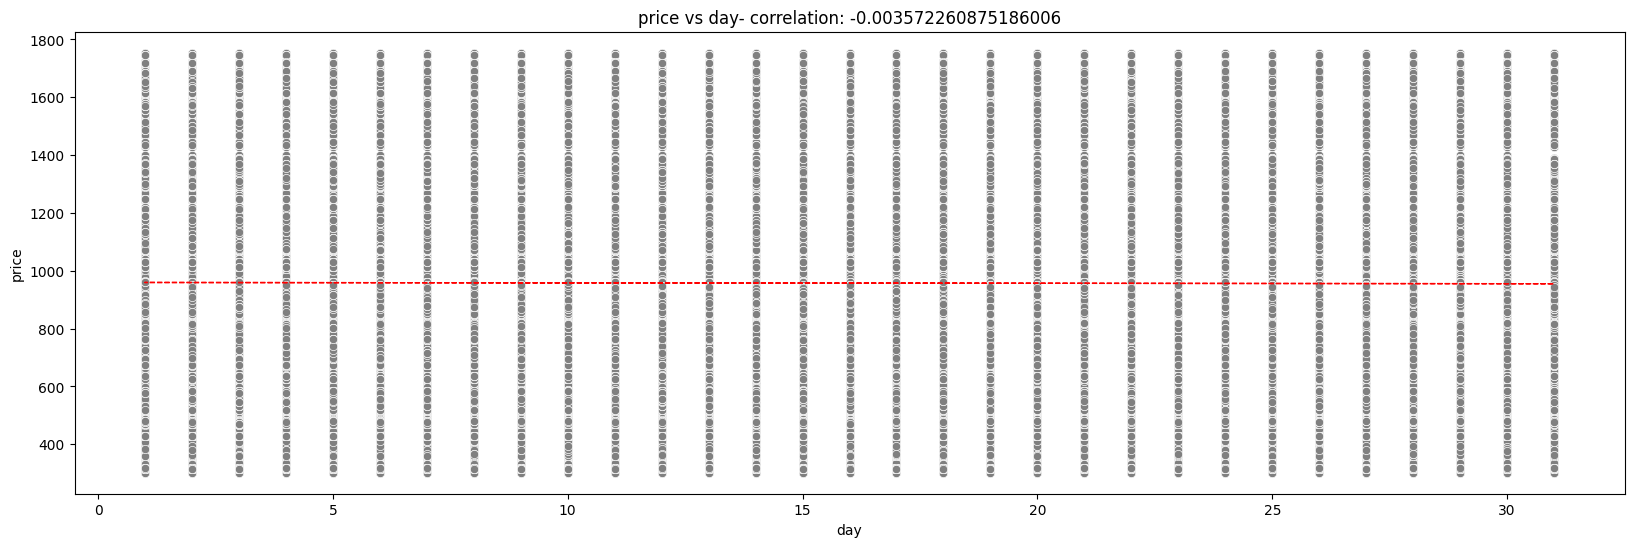

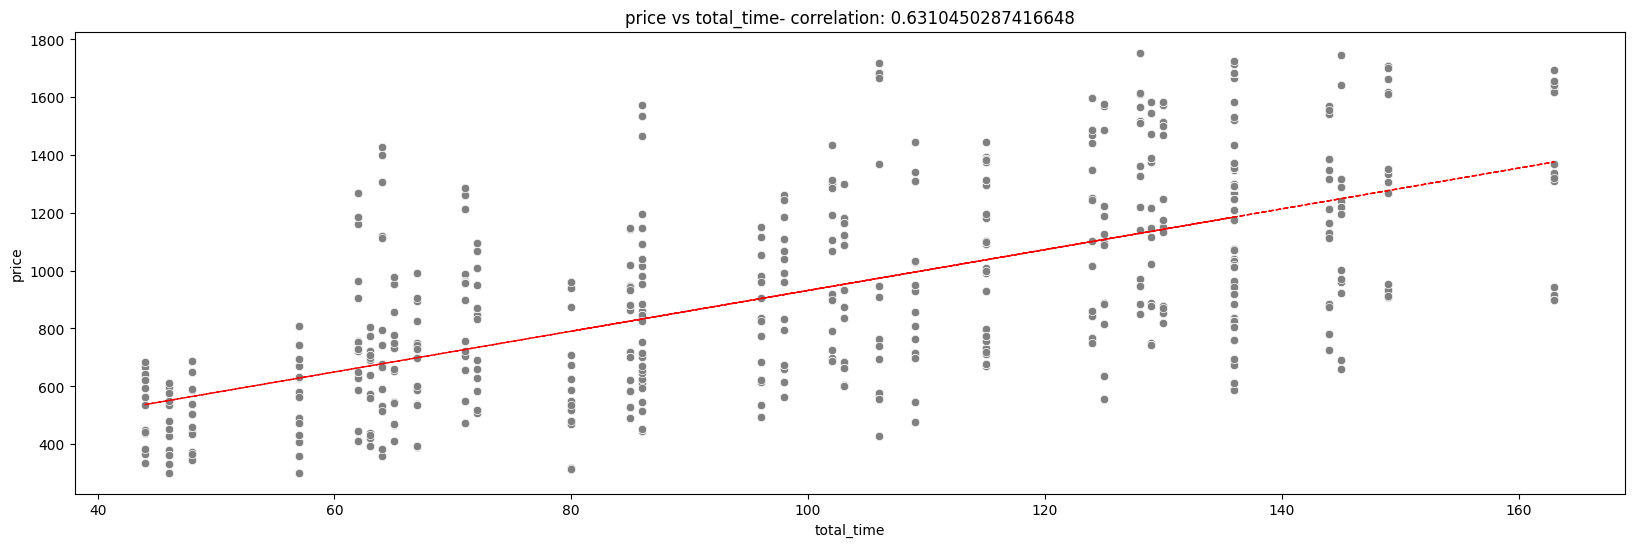

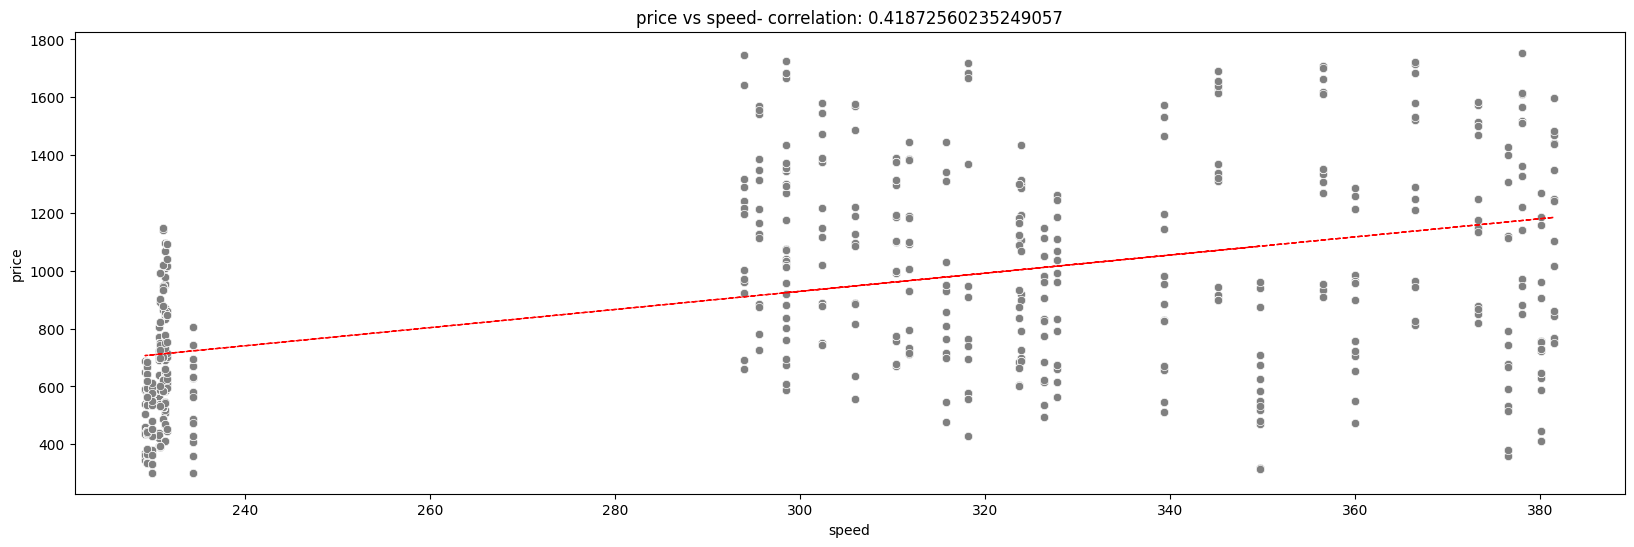

In [ ]:
# Selecting features to avoid overfitting

for col in encode_df.describe().columns.tolist():
    fig = plt.figure(figsize=(20, 6))
    ax = fig.gca()
    feature = encode_df[col]
    label = encode_df['price']
    correlation = feature.corr(label)
    sns.scatterplot(x=feature, y=label, color="gray")
    plt.xlabel(col)
    plt.ylabel('price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(encode_df[col], encode_df['price'], 1)
    y_hat = np.poly1d(z)(encode_df[col])
    plt.plot(encode_df[col], y_hat, "r--", lw=1)
    plt.show()

In [ ]:
concat_encode_df.corr()

from        to  flightType    agency     route   company  \
from        1.000000 -0.177147    0.000664 -0.001697  0.993522  0.110116   
to         -0.177147  1.000000    0.000664 -0.001697 -0.067732  0.110116   
flightType  0.000664  0.000664    1.000000  0.000679  0.000792 -0.001954   
agency     -0.001697 -0.001697    0.000679  1.000000 -0.001886  0.001775   
route       0.993522 -0.067732    0.000792 -0.001886  1.000000  0.121818   
company     0.110116  0.110116   -0.001954  0.001775  0.121818  1.000000   
name_x     -0.001543 -0.001543   -0.000443 -0.005047 -0.001658 -0.019207   
gender     -0.008956 -0.008956   -0.005878 -0.001153 -0.009978 -0.041654   
name_y     -0.026907 -0.026907    0.001494  0.001122 -0.029931  0.011203   
place       0.146702  0.146702    0.001576  0.000028  0.164892 -0.003180   
travelCode  0.085893  0.085893   -0.000607 -0.001368  0.097971  0.619987   
userCode_x  0.085451  0.085451   -0.000568 -0.001418  0.097511  0.613097   
price_x     0.028157 -0.087037    0.272147  0.000974  0.017137 -0.013873   
distance    0.001387  0.001387    0.004487 -0.000343  0.005063 -0.019173   
month       0.000632  0.003365   -0.000744  0.002657  0.001047  0.003729   
year       -0.002945 -0.005892    0.001596 -0.000189 -0.003579 -0.014789   
day        -0.001705 -0.003196    0.001375  0.000526 -0.002117 -0.000975   
total_time -0.000493 -0.000493    0.003769  0.000756  0.003825  0.000841   
speed      -0.000151 -0.000151    0.003957 -0.002369 -0.000597 -0.035070   
age        -0.007474 -0.007474    0.001963 -0.002935 -0.008615 -0.001437   
days        0.001180  0.001180   -0.003287 -0.002331  0.001281 -0.005963   
price_y    -0.015797 -0.015797   -0.004767  0.006264 -0.014562  0.028272   
total      -0.007852 -0.007852   -0.004828  0.001924 -0.006929  0.013574   

              name_x    gender    name_y     place  ...  distance     month  \
from       -0.001543 -0.008956 -0.026907  0.146702  ...  0.001387  0.000632   
to         -0.001543 -0.008956 -0.026907  0.146702  ...  0.001387  0.003365   
flightType -0.000443 -0.005878  0.001494  0.001576  ...  0.004487 -0.000744   
agency     -0.005047 -0.001153  0.001122  0.000028  ... -0.000343  0.002657   
route      -0.001658 -0.009978 -0.029931  0.164892  ...  0.005063  0.001047   
company    -0.019207 -0.041654  0.011203 -0.003180  ... -0.019173  0.003729   
name_x      1.000000 -0.073796 -0.003008 -0.001348  ...  0.015493 -0.000682   
gender     -0.073796  1.000000 -0.001104 -0.001005  ... -0.006927 -0.001278   
name_y     -0.003008 -0.001104  1.000000  0.647496  ...  0.070716 -0.001550   
place      -0.001348 -0.001005  0.647496  1.000000  ...  0.005179  0.000382   
travelCode  0.005691 -0.025629  0.027724 -0.005482  ...  0.310703  0.003233   
userCode_x  0.006618 -0.025657  0.027840 -0.005488  ...  0.313996  0.003260   
price_x     0.007544 -0.002276  0.040995 -0.009051  ...  0.641915 -0.000013   
distance    0.015493 -0.006927  0.070716  0.005179  ...  1.000000  0.000942   
month      -0.000682 -0.001278 -0.001550  0.000382  ...  0.000942  1.000000   
year        0.021280  0.001642  0.001979 -0.002717  ...  0.008011 -0.355074   
day        -0.001042 -0.000063 -0.002249 -0.004160  ... -0.004863  0.017104   
total_time  0.016973 -0.007747  0.046165 -0.002692  ...  0.955154  0.001283   
speed       0.007323 -0.005594  0.081135  0.015932  ...  0.709277  0.000454   
age         0.044291 -0.022434 -0.001588 -0.000795  ... -0.025818  0.001375   
days       -0.002757 -0.004475 -0.001537  0.007193  ... -0.001956  0.001025   
price_y     0.003332  0.007800 -0.223930 -0.010092  ...  0.223009  0.003664   
total      -0.001695  0.000279 -0.134509 -0.000219  ...  0.132348  0.004766   

                year       day  total_time     speed       age      days  \
from       -0.002945 -0.001705   -0.000493 -0.000151 -0.007474  0.001180   
to         -0.005892 -0.003196   -0.000493 -0.000151 -0.007474  0.001180   
flightType  0.001596  0.001375    0.003769  0.003957  0.001963 -0.

<Axes: >

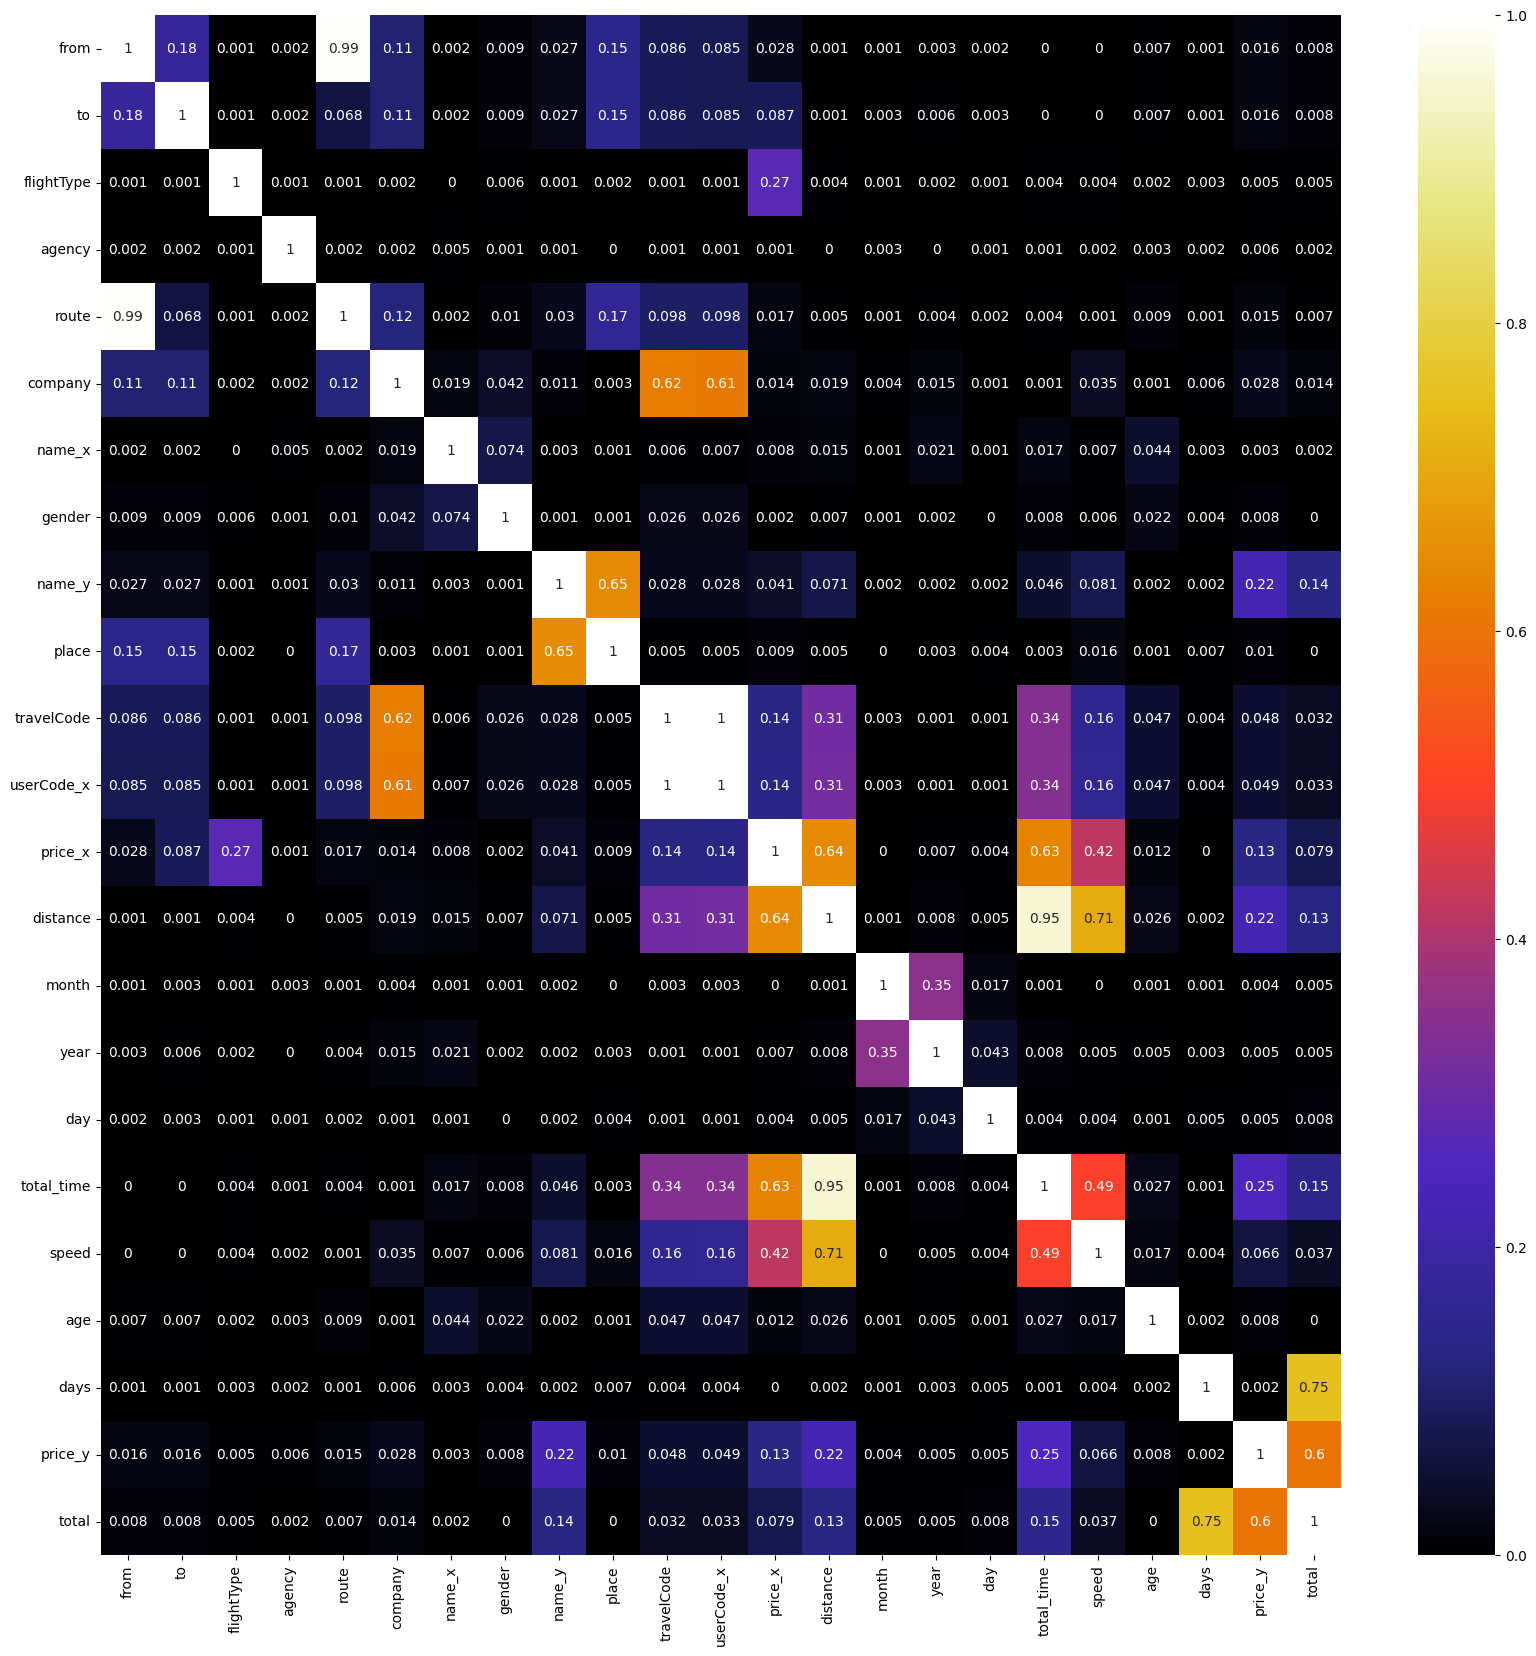

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(abs(round(concat_encode_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

The given correlation matrix shows that there are no significant variables strongly correlated with the flight price.

In [ ]:
final_df=encode_df[['from','to','flightType','agency','month','year','price']]

In [ ]:
final_df.head()

from  to  flightType  agency  month  year    price
0     5   3           1       1      9  2019  1434.38
1     3   5           1       1      9  2019  1292.29
2     1   3           1       0     10  2019  1487.52
3     3   1           1       0     10  2019  1127.36
4     0   7           1       0     10  2019  1684.05

<Axes: >

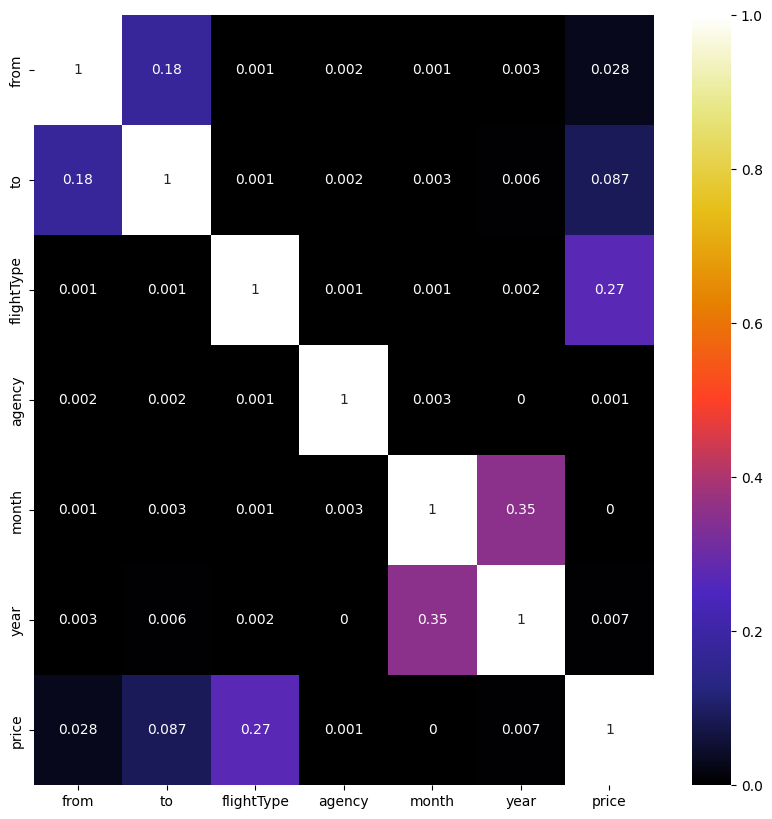

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(round(final_df.corr(),3)), annot=True, cmap=plt.cm.CMRmap)

In [ ]:
final_df.head()

from  to  flightType  agency  month  year    price
0     5   3           1       1      9  2019  1434.38
1     3   5           1       1      9  2019  1292.29
2     1   3           1       0     10  2019  1487.52
3     3   1           1       0     10  2019  1127.36
4     0   7           1       0     10  2019  1684.05

In [ ]:
final_df.columns

Index(['from', 'to', 'flightType', 'agency', 'month', 'year', 'price'], dtype='object')

In [ ]:
FEATURE_COLUMNS = [
    'from',
    'to',
    'flightType',
    'agency',
    'month',
    'year'
]


In [ ]:
x = final_df.drop('price', axis=1)  # keep DataFrame
y = final_df['price']


In [ ]:
FEATURE_COLUMNS = x.columns.tolist()
print(FEATURE_COLUMNS)


['from', 'to', 'flightType', 'agency', 'month', 'year']


In [ ]:
# Creating object
std_regressor= StandardScaler()

# Fit and Transform
x= std_regressor.fit_transform(x)

In [ ]:
joblib.dump(std_regressor, '/content/std_regressor.pkl')

['/content/std_regressor.pkl']

In [ ]:
# Copy the file to Google Drive
!cp std_regressor.pkl '/content/drive/MyDrive'
print('scaler saved to Google Drive')

scaler saved to Google Drive


Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets (80-20 ratio)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Verifying the shapes of the split data
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(217510, 6)
(54378, 6)
(217510,)
(54378,)


In [ ]:
# Train model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(x_train, y_train)


RandomForestRegressor()

In [ ]:
artifacts = {
    "model": rf_model,
    "features": FEATURE_COLUMNS,
    "scaler": std_regressor,
    "label_encoders": label_encoders
}


In [ ]:
# Evaluate
pred = rf_model.predict(x_test)
rmse = mean_squared_error(y_test, pred)
print("RMSE:", rmse)

RMSE: 0.015924514670632352


In [ ]:
import pickle

In [ ]:
# Save the File
filename='flight_price_main.pkl'

# serialize process
pickle.dump(rf_model,open(filename,'wb'))

In [ ]:
# Load the File and predict unseen data.
rf_model = joblib.load("flight_price_main.pkl")

# Predicting the unseen data(test set)
rf_model.predict(x_test)

array([ 481.42, 1124.11, 1174.97, ...,  961.99,  674.16, 1616.44])

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Copy the file to Google Drive
#!cp flight_price_main.pkl '/content/drive/MyDrive'
#print('Model saved to Google Drive')

Model saved to Google Drive
